#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


In [16]:
import cv2
import sys

# 1. Attempt to load the image
image_path = "Plaksha_Faculty.jpg"
img = cv2.imread(image_path)
if img is None:
    print(f"Error: Could not load the image '{image_path}'. Check the file path and name.")
    sys.exit(1)
print("Image shape:", img.shape)

# 2. Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. Load the Haar cascade and check if loaded
cascade_path = "haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(cascade_path)
if face_cascade.empty():
    print(f"Error: Could not load Haar cascade '{cascade_path}'. Check the file path.")
    sys.exit(1)

# 4. Apply face detection with your original parameters
faces_rect = face_cascade.detectMultiScale(
    gray_img,
    scaleFactor=1.05,
    minNeighbors=4,
    minSize=(25, 25),
    maxSize=(50, 50)
)

print(f"Number of faces detected: {len(faces_rect)}")

# 5. Define text/label parameters
text = "Plaksha"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_color = (0, 0, 255)  # BGR (red)
font_thickness = 2

# 6. Draw rectangles and label each detected face
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.putText(
        img, text, (x, y - 10),
        font, font_scale, font_color, font_thickness
    )

# 7. Show the result in a named window
window_title = f"Total faces detected: {len(faces_rect)}"
cv2.imshow(window_title, img)
cv2.waitKey(0)
cv2.destroyAllWindows()


Image shape: (854, 1280, 3)
Number of faces detected: 30


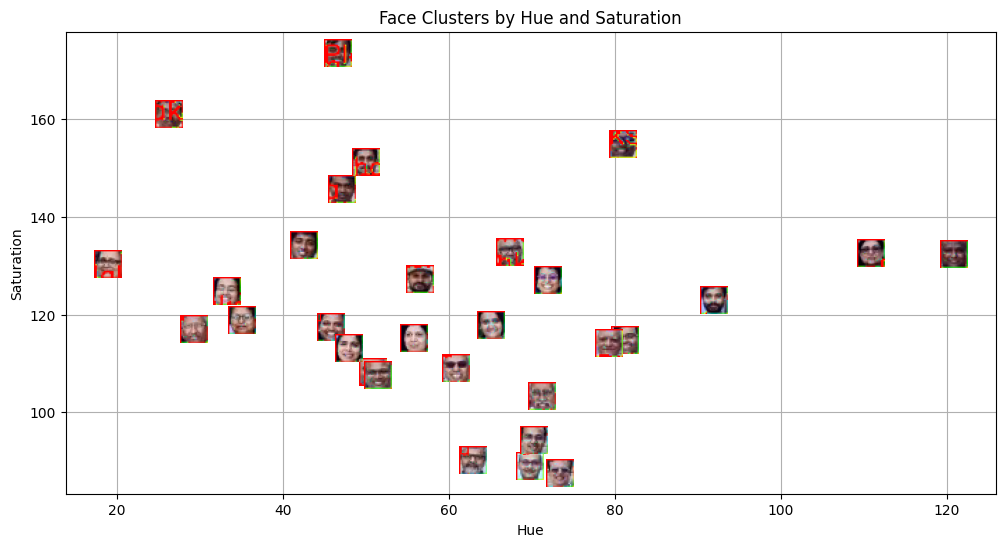

In [17]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.cluster import KMeans

# 1. Convert the original image from BGR to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

hue_saturation = []
face_images = []  # To store detected face images

# 2. Extract face region features (Hue and Saturation)
for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

# 3. Perform k-Means clustering on hue_saturation
kmeans = KMeans(n_clusters=2, random_state=42).fit(hue_saturation)
# centroids = kmeans.cluster_centers_
# labels = kmeans.labels_

# 4. Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(12, 6))

# 5. Plot the clustered faces with custom markers
for i, (x, y, w, h) in enumerate(faces_rect):
    # Convert face_images[i] from HSV to RGB, resize to 20x20
    resized_face_rgb = cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB)

    # Create an OffsetImage to place the face as a marker
    im = OffsetImage(resized_face_rgb)
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), 
                        frameon=False, pad=0)
    ax.add_artist(ab)

    # Plot the (hue, saturation) point on the graph
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o')

# 6. Label the axes, add title, grid, and show the plot
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Face Clusters by Hue and Saturation")
plt.grid(True)
plt.show()


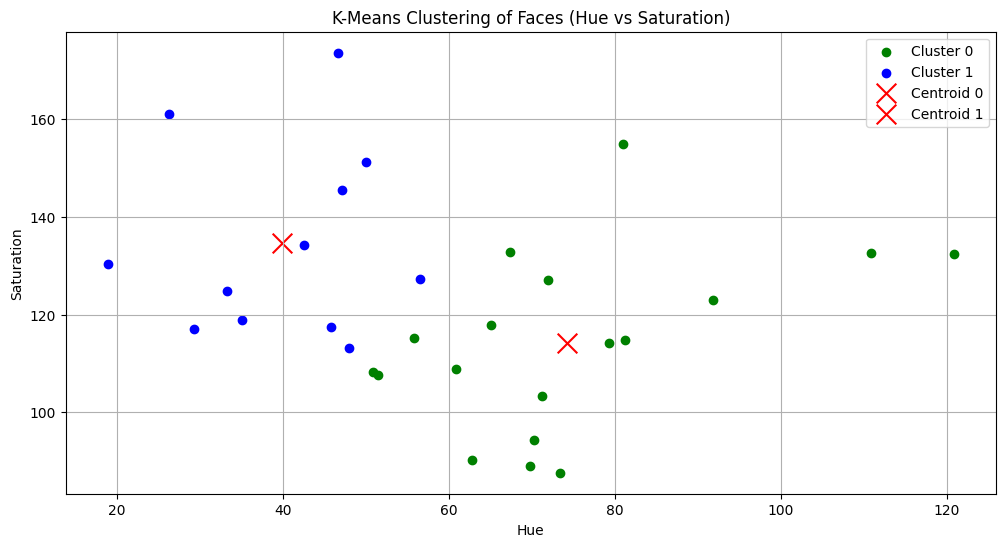

In [18]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))

for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1 in red with 'x' markers
plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='x', s=200, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='red', marker='x', s=200, label='Centroid 1')

# Put x label
plt.xlabel("Hue")

# Put y label
plt.ylabel("Saturation")

# Put title
plt.title("K-Means Clustering of Faces (Hue vs Saturation)")

# Add a legend
plt.legend()

# Add grid
plt.grid(True)

# Show the plot
plt.show()


In [19]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")

# Convert the template image to gray
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)

# Detect face in the template image (assuming you have a CascadeClassifier called face_cascade)
template_faces = face_cascade.detectMultiScale(template_gray, 1.3, 5)

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

cv2.imshow("Detected face in template", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


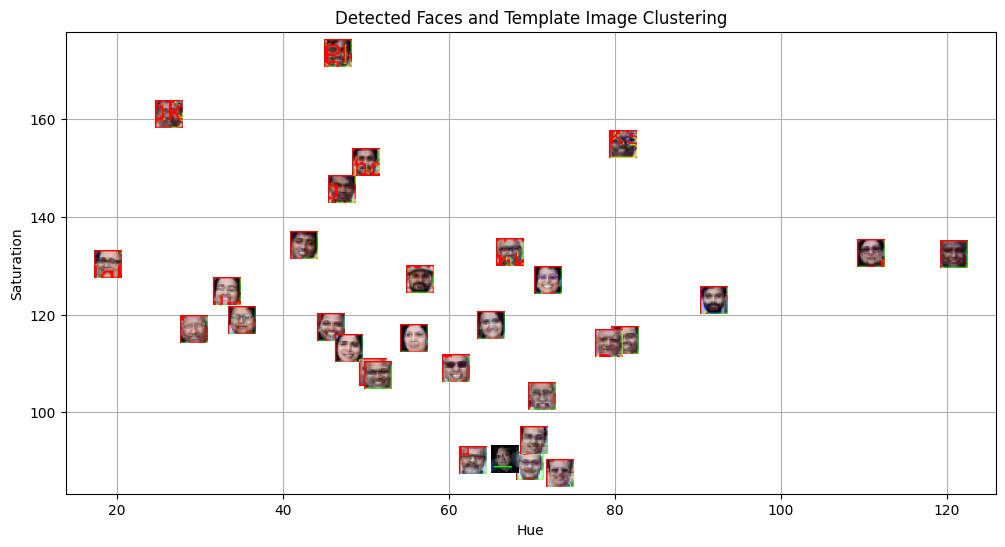

In [20]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'

im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)
plt.plot(template_hue, template_saturation, 'o', markersize=5, color=color)

# Put x label
plt.xlabel("Hue")

# Put y label
plt.ylabel("Saturation")

# Put title
plt.title("Detected Faces and Template Image Clustering")

# Add grid
plt.grid(True)

# Show plot
plt.show()


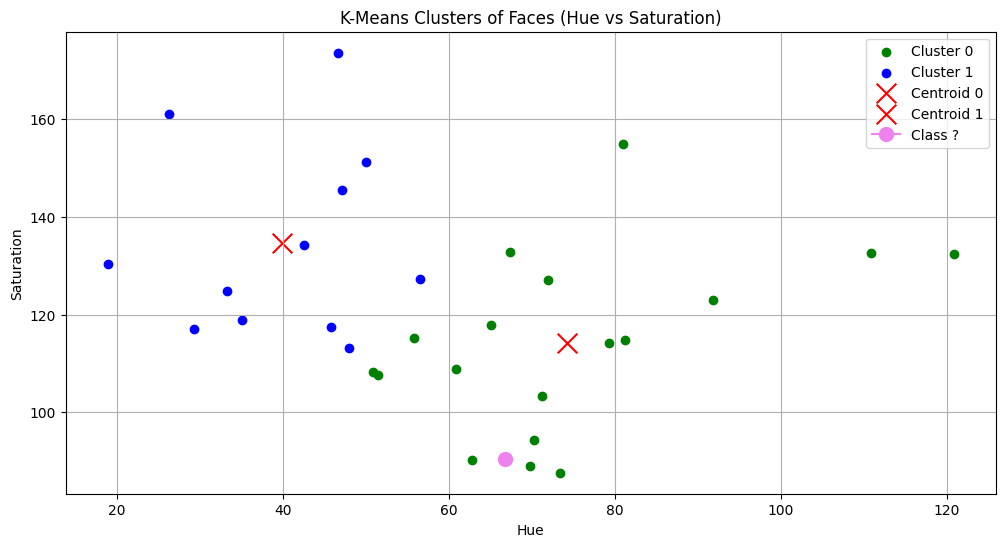

In [21]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(
    cluster_0_points[:, 0],  # x values (Hue)
    cluster_0_points[:, 1],  # y values (Saturation)
    color='green',
    label='Cluster 0'
)

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(
    cluster_1_points[:, 0],  # x values (Hue)
    cluster_1_points[:, 1],  # y values (Saturation)
    color='blue',
    label='Cluster 1'
)

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

plt.scatter(
    centroid_0[0], 
    centroid_0[1], 
    marker='x', 
    s=200, 
    c='red',
    label='Centroid 0'
)
plt.scatter(
    centroid_1[0], 
    centroid_1[1], 
    marker='x', 
    s=200, 
    c='red',
    label='Centroid 1'
)

# Plot the template image point in violet
plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10, label='Class ?')

# Put x label
plt.xlabel("Hue")

# Put y label
plt.ylabel("Saturation")

# Put title
plt.title("K-Means Clusters of Faces (Hue vs Saturation)")

# Add a legend
plt.legend()

# Add grid
plt.grid(True)

# Show the plot
plt.show()


## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 
In distance-based classification, commonly used distance metrics are Euclidean, Manhattan, and Minkowski. Euclidean measures straight-line distance, Manhattan sums absolute differences across each dimension, and Minkowski generalizes both. Sometimes Cosine similarity is also used, especially in text-based tasks.


#### 2. What are some real-world applications of distance-based classification algorithms?

Distance-based classification is seen in recommendation systems, anomaly detection, medical diagnoses, and image recognition. For instance, KNN can match patient symptoms to known cases for diagnosing illnesses or suggest products by comparing similar user preferences.

#### 3. Explain various distance metrics. 

Euclidean distance measures straight-line separation, Manhattan sums absolute differences, and Minkowski unifies both approaches by introducing a parameter. Meanwhile, Cosine similarity evaluates the angle between vectors, which is particularly useful for textual or high-dimensional data comparisons.

#### 4. What is the role of cross validation in model performance? 

Cross-validation splits data into training and validation folds to gauge how well a model generalizes to unseen data. It mitigates overfitting risks by ensuring that performance estimates are more representative of real-world scenarios.

#### 5. Explain variance and bias in terms of KNN?

In KNN, lower bias means the model closely fits training data, while higher variance makes it sensitive to small data changes. Increasing the number of neighbors usually reduces variance but may raise bias, balancing flexibility and stability.







